Pass or fail based on critieria 
final grade prediction for values that do not have a final grade 
a knn (idk which one yet)

In [99]:
import pandas as pd
import dmba
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pylab as plt
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor

In [100]:
student_performace = pd.read_csv('student_performance_updated_1000.csv')


In [101]:
def dataCleaning(student_performace):
    student_performace.columns = [s.strip().replace(' ','_') for s in student_performace.columns]
    return student_performace[
    (student_performace['StudyHoursPerWeek'] > 0) &
    (student_performace['AttendanceRate'] <= 100) &
    ((student_performace['FinalGrade'] <= 100)|
    (student_performace['FinalGrade'].isna()))&
    (student_performace['Study_Hours']>=0)
    ]


In [102]:
#descriptive statistic

student_performace.sample(5)


,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study Hours,Attendance (%),Online Classes Taken
868,7233.0,Shannon Spencer,Female,88.0,17.0,82.0,0.0,Low,88.0,2.4,71.0,True
153,4711.0,Adam Weaver,Male,78.0,20.0,82.0,2.0,Low,72.0,4.2,83.0,True
175,3068.0,Jacob Murray,Male,92.0,30.0,88.0,0.0,Low,80.0,3.0,93.0,False
6,7.0,Daniel,Male,70.0,8.0,60.0,0.0,Low,62.0,4.5,96.0,False
899,9978.0,Paul Poole,Female,90.0,10.0,88.0,3.0,High,85.0,2.3,60.0,True


## Data Preprocessing

In [103]:
student_performace.isna().sum()
reduced_performace = student_performace
#fill all values with mean 
num_cols = reduced_performace.select_dtypes(include=['number']).columns
num_cols
for col in num_cols:
    reduced_performace[col].fillna(student_performace[col].mean(),inplace=True)
#just drop everything 
reduced_performace = reduced_performace.dropna()
reduced_performace = dataCleaning(reduced_performace)

In [104]:
reduced_performace.describe()

,StudentID,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade,Study_Hours,Attendance_(%)
count,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000
mean,5426.313846,85.349672,17.630864,77.670843,1.520430,80.179652,2.477729,76.003662
std,2637.096352,7.182196,6.149730,9.877165,1.010117,9.304933,1.431376,14.278849
min,1.000000,70.000000,8.000000,60.000000,0.000000,62.000000,0.000000,50.000000
25%,3137.000000,82.000000,12.000000,70.000000,1.000000,72.000000,1.200000,64.000000
50%,5416.019792,85.510417,17.630526,78.000000,1.520376,80.030208,2.500000,77.000000
75%,7701.000000,91.000000,22.000000,86.000000,2.000000,88.000000,3.700000,88.000000
max,9998.000000,95.000000,30.000000,90.000000,3.000000,92.000000,5.000000,100.000000


## HeatMap

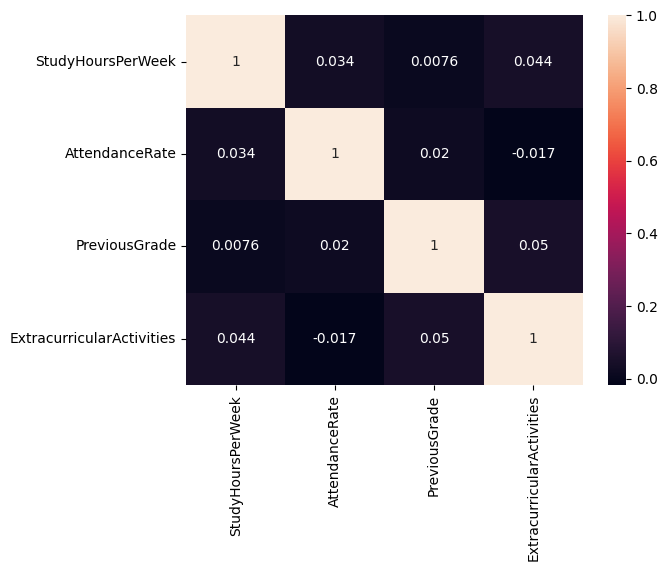

In [105]:
heatMapvariables =['StudyHoursPerWeek', 'AttendanceRate', 'PreviousGrade','ExtracurricularActivities'
            ,'Online_Classes_Taken']
heatMapData = reduced_performace[heatMapvariables]
corr= heatMapData.corr(numeric_only=True)
seaborn.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,annot=True)
plt.show()

We want to predict the final grades of students based on the various supervised learning techniques we have done in class so far
these are 
knn
nn
linear regression 
regression trees
ensembles

## Linear Regression(multiple)

In [106]:
variables =['StudyHoursPerWeek', 'AttendanceRate', 'PreviousGrade','ExtracurricularActivities',
            'ParentalSupport_Low','ParentalSupport_Medium','Gender_Male','Online_Classes_Taken_True']

In [107]:
reduced_performace= pd.get_dummies(reduced_performace,drop_first=True,columns=['ParentalSupport','Gender','Online_Classes_Taken'])
reduced_performace

,StudentID,Name,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade,Study_Hours,Attendance_(%),ParentalSupport_Low,ParentalSupport_Medium,Gender_Male,Online_Classes_Taken_True
0,1.000000,John,85.000000,15.000000,78.000000,1.0,80.000000,4.8,59.0,False,False,True,False
1,2.000000,Sarah,90.000000,20.000000,85.000000,2.0,87.000000,2.2,70.0,False,True,False,True
2,3.000000,Alex,78.000000,10.000000,65.000000,0.0,68.000000,4.6,92.0,True,False,True,False
3,4.000000,Michael,92.000000,25.000000,90.000000,3.0,92.000000,2.9,96.0,False,False,True,False
4,5.000000,Emma,85.510417,18.000000,82.000000,2.0,85.000000,4.1,97.0,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,2787.000000,Shannon Porter,78.000000,20.000000,60.000000,0.0,62.000000,1.6,70.0,False,False,True,False
995,5416.019792,Kenneth Murray,85.000000,20.000000,77.598759,1.0,72.000000,0.8,80.0,False,False,True,True
996,4497.000000,Amy Stout,91.000000,17.630526,86.000000,0.0,90.000000,3.9,80.0,False,False,False,True
998,7636.000000,Joseph Sherman,88.000000,17.000000,60.000000,2.0,85.000000,0.9,53.0,False,False,True,True


In [108]:
#define dependent and independent variables

X=reduced_performace[variables]
y=reduced_performace[['FinalGrade']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
predictedFinal = regr.predict(X_test)
r2_score_value = regr.score(X_test, y_test)
print(f"R-squared (R2) score: {r2_score_value}")

R-squared (R2) score: -0.01527513085036758


## Knn

In [109]:
variables =['StudyHoursPerWeek', 'AttendanceRate', 'PreviousGrade','Attendance_(%)','ExtracurricularActivities','Study_Hours'
            ,'Online_Classes_Taken_True','Online_Classes_Taken_False','ParentalSupport_Low','ParentalSupport_Medium','ParentalSupport_High','Gender_Male','Gender_Female']

In [110]:
reduced_performace = student_performace.dropna()
reduced_performace = dataCleaning(reduced_performace)
reduced_performace= pd.get_dummies(reduced_performace,drop_first=False,columns=['ParentalSupport','Gender','Online_Classes_Taken'])
X= reduced_performace[variables]
y = reduced_performace['FinalGrade']
reduced_performace

,StudentID,Name,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade,Study_Hours,Attendance_(%),ParentalSupport_High,ParentalSupport_Low,ParentalSupport_Medium,Gender_Female,Gender_Male,Online_Classes_Taken_False,Online_Classes_Taken_True
0,1.000000,John,85.000000,15.000000,78.000000,1.0,80.000000,4.8,59.0,True,False,False,False,True,True,False
1,2.000000,Sarah,90.000000,20.000000,85.000000,2.0,87.000000,2.2,70.0,False,False,True,True,False,False,True
2,3.000000,Alex,78.000000,10.000000,65.000000,0.0,68.000000,4.6,92.0,False,True,False,False,True,True,False
3,4.000000,Michael,92.000000,25.000000,90.000000,3.0,92.000000,2.9,96.0,True,False,False,False,True,True,False
4,5.000000,Emma,85.510417,18.000000,82.000000,2.0,85.000000,4.1,97.0,False,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,2787.000000,Shannon Porter,78.000000,20.000000,60.000000,0.0,62.000000,1.6,70.0,True,False,False,False,True,True,False
995,5416.019792,Kenneth Murray,85.000000,20.000000,77.598759,1.0,72.000000,0.8,80.0,True,False,False,False,True,False,True
996,4497.000000,Amy Stout,91.000000,17.630526,86.000000,0.0,90.000000,3.9,80.0,True,False,False,True,False,False,True
998,7636.000000,Joseph Sherman,88.000000,17.000000,60.000000,2.0,85.000000,0.9,53.0,True,False,False,False,True,False,True


In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn = KNeighborsRegressor(n_neighbors=100)
knn.fit(X_train_scaled, y_train)

,n_neighbors,100
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [112]:
y_pred = knn.predict(X_test_scaled)
print("KNN R2:", r2_score(y_test, y_pred))

KNN R2: -0.007969671142728174


## CART

In [113]:
reduced_performace = student_performace.dropna()
reduced_performace = dataCleaning(reduced_performace)
reduced_performace= pd.get_dummies(reduced_performace,drop_first=False,columns=['ParentalSupport','Gender','Online_Classes_Taken'])
X= reduced_performace[variables]
y = reduced_performace['FinalGrade']
reduced_performace

,StudentID,Name,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,FinalGrade,Study_Hours,Attendance_(%),ParentalSupport_High,ParentalSupport_Low,ParentalSupport_Medium,Gender_Female,Gender_Male,Online_Classes_Taken_False,Online_Classes_Taken_True
0,1.000000,John,85.000000,15.000000,78.000000,1.0,80.000000,4.8,59.0,True,False,False,False,True,True,False
1,2.000000,Sarah,90.000000,20.000000,85.000000,2.0,87.000000,2.2,70.0,False,False,True,True,False,False,True
2,3.000000,Alex,78.000000,10.000000,65.000000,0.0,68.000000,4.6,92.0,False,True,False,False,True,True,False
3,4.000000,Michael,92.000000,25.000000,90.000000,3.0,92.000000,2.9,96.0,True,False,False,False,True,True,False
4,5.000000,Emma,85.510417,18.000000,82.000000,2.0,85.000000,4.1,97.0,False,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,2787.000000,Shannon Porter,78.000000,20.000000,60.000000,0.0,62.000000,1.6,70.0,True,False,False,False,True,True,False
995,5416.019792,Kenneth Murray,85.000000,20.000000,77.598759,1.0,72.000000,0.8,80.0,True,False,False,False,True,False,True
996,4497.000000,Amy Stout,91.000000,17.630526,86.000000,0.0,90.000000,3.9,80.0,True,False,False,True,False,False,True
998,7636.000000,Joseph Sherman,88.000000,17.000000,60.000000,2.0,85.000000,0.9,53.0,True,False,False,False,True,False,True


In [114]:
X = reduced_performace[variables]        # predictors
y = reduced_performace['FinalGrade']     # outcome

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the CART regressor
regressor = DecisionTreeRegressor(criterion='squared_error', max_depth=len(variables), random_state=42)
regressor.fit(X_train, y_train)

# Predict on test set
y_pred = regressor.predict(X_test)

In [116]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 184.97
Mean Absolute Error: 10.99
R² Score: -1.23
